This code creates a simulated yield curve and analyses the Net Present Value (NPV) of the interest rate swap. It also conducts the analysis on a flat and upwards yield curve, then compares all three values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

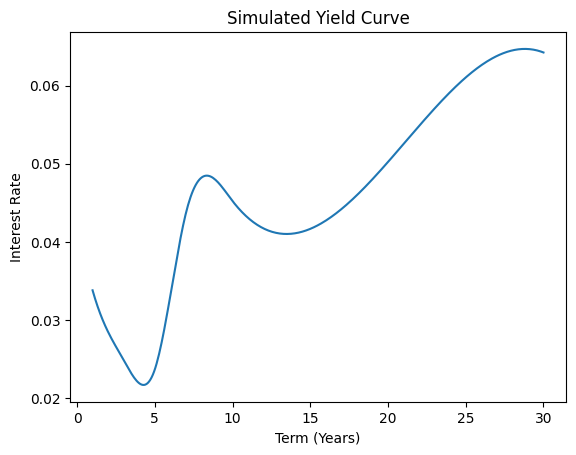

In [5]:
def simulate_yield_curve():
    terms = np.array([1, 2, 3, 5, 7, 10, 20, 30])
    rates = np.random.normal(0.02, 0.01, size=len(terms)) + np.log(terms) * 0.01  # Simple simulation
    yield_curve = interp1d(terms, rates, kind='cubic', fill_value="extrapolate")
    return yield_curve

# Example yield curve
yield_curve = simulate_yield_curve()
terms = np.linspace(1, 30, 360)
plt.plot(terms, yield_curve(terms))
plt.title('Simulated Yield Curve')
plt.xlabel('Term (Years)')
plt.ylabel('Interest Rate')
plt.show()

In [6]:
class InterestRateSwap:
    def __init__(self, notional, fixed_rate, maturity_years, payment_frequency):
        self.notional = notional
        self.fixed_rate = fixed_rate
        self.maturity_years = maturity_years
        self.payment_frequency = payment_frequency
        
    def fixed_leg_pv(self, yield_curve):
        cash_flows = np.array([self.notional * self.fixed_rate / self.payment_frequency 
                               for _ in range(int(self.maturity_years * self.payment_frequency))])
        discount_factors = np.array([np.exp(-yield_curve((i+1)/self.payment_frequency) * (i+1)/self.payment_frequency) 
                                     for i in range(len(cash_flows))])
        pv = np.sum(cash_flows * discount_factors)
        return pv
    
    def floating_leg_pv(self, yield_curve):
        # Simplification: Assume floating rate resets to current yield curve rate
        cash_flows = np.array([self.notional * yield_curve((i+1)/self.payment_frequency) / self.payment_frequency 
                               for i in range(int(self.maturity_years * self.payment_frequency))])
        discount_factors = np.array([np.exp(-yield_curve((i+1)/self.payment_frequency) * (i+1)/self.payment_frequency) 
                                     for i in range(len(cash_flows))])
        pv = np.sum(cash_flows * discount_factors)
        return pv
    
    def net_pv(self, yield_curve):
        return self.fixed_leg_pv(yield_curve) - self.floating_leg_pv(yield_curve)


In [9]:
swap = InterestRateSwap(notional=1000000, fixed_rate=0.025, maturity_years=5, payment_frequency=4)

# Flat yield curve
flat_curve = simulate_yield_curve()
flat_curve_rates = np.full(30, 0.03)
flat_curve = interp1d(np.linspace(1, 30, 30), flat_curve_rates, kind='cubic', fill_value="extrapolate")

# Upward sloping yield curve
upward_curve = simulate_yield_curve()
upward_curve_rates = np.linspace(0.01, 0.05, 30)
upward_curve = interp1d(np.linspace(1, 30, 30), upward_curve_rates, kind='cubic', fill_value="extrapolate")

# Valuation
print("Net PV with original curve:", swap.net_pv(yield_curve))
print("Net PV with flat curve:", swap.net_pv(flat_curve))
print("Net PV with upward curve:", swap.net_pv(upward_curve))


Net PV with original curve: -13539.480937401837
Net PV with flat curve: -23128.388569547446
Net PV with upward curve: 61834.28596877617
